In [6]:
df = pd.read_csv('..\\datas\\recipes_with_profiles.csv')
df.drop(columns=['sehir'], inplace=True)
df.head()

,kategori_id,tarif_adi,tarif_url,profil_adi,kayit_ay,tarif_sayisi,takipci,takip,eslesen_sehir
0,1,Çiğ Köfte,https://www.nefisyemektarifleri.com/cig-kofte-...,eminezeynep58,96.0,9.0,3.0,1.0,Sivas
1,1,Orjinal Çiğköfte,https://www.nefisyemektarifleri.com/orjinal-ci...,bircan79,138.0,919.0,17684.0,9.0,Kilis
2,1,Etli Urfa Çiğköftesi,https://www.nefisyemektarifleri.com/etli-urfa-...,burcintrs,72.0,212.0,288.0,73.0,Ankara
3,1,Hakiki Çiğköfte,https://www.nefisyemektarifleri.com/hakiki-cig...,mervisteyze,55.0,25.0,64.0,0.0,İstanbul
4,1,Çiğ Köfte (Etli),https://www.nefisyemektarifleri.com/cig-kofte-...,iugurchef,57.0,81.0,939.0,4.0,İstanbul


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321312 entries, 0 to 321311
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   kategori_id    321312 non-null  int64  
 1   tarif_adi      321312 non-null  object 
 2   tarif_url      321312 non-null  object 
 3   profil_adi     321312 non-null  object 
 4   kayit_ay       321312 non-null  float64
 5   tarif_sayisi   321293 non-null  float64
 6   takipci        321312 non-null  float64
 7   takip          321312 non-null  float64
 8   eslesen_sehir  321312 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 22.1+ MB


In [8]:
df.describe()

,kategori_id,kayit_ay,tarif_sayisi,takipci,takip
count,321312.000000,321312.000000,321293.000000,321312.000000,321312.000000
mean,42.052749,90.096971,117.946883,803.542759,80.322917
std,18.509044,31.216590,167.334459,3013.613463,472.792846
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,25.000000,65.000000,19.000000,27.000000,4.000000
50%,41.000000,92.000000,52.000000,92.000000,12.000000
75%,59.000000,116.000000,146.000000,375.000000,35.000000
max,68.000000,213.000000,1363.000000,48908.000000,16072.000000


In [9]:
missing_counts = df.isna().sum()
print(missing_counts)
df_clean = df.dropna(subset=['eslesen_sehir'])
df_clean['takipci'] = df_clean['takipci'].fillna(df_clean['takipci'].median())
df_clean['takip'] = df_clean['takip'].fillna(df_clean['takip'].median())
df_clean['tarif_sayisi'] = df_clean['tarif_sayisi'].fillna(df_clean['tarif_sayisi'].median())

missing_counts = df_clean.isna().sum()
print(missing_counts)


kategori_id       0
tarif_adi         0
tarif_url         0
profil_adi        0
kayit_ay          0
tarif_sayisi     19
takipci           0
takip             0
eslesen_sehir     0
dtype: int64
kategori_id      0
tarif_adi        0
tarif_url        0
profil_adi       0
kayit_ay         0
tarif_sayisi     0
takipci          0
takip            0
eslesen_sehir    0
dtype: int64


In [10]:
print(df_clean.dtypes)
categorical_cols = ['kategori_id', 'tarif_adi', 'profil_adi', 'eslesen_sehir']
for col in categorical_cols:
    print(f"{col} unique values: {df_clean[col].nunique()}")

kategori_id        int64
tarif_adi         object
tarif_url         object
profil_adi        object
kayit_ay         float64
tarif_sayisi     float64
takipci          float64
takip            float64
eslesen_sehir     object
dtype: object
kategori_id unique values: 66
tarif_adi unique values: 172640
profil_adi unique values: 21807
eslesen_sehir unique values: 81


In [11]:
numeric_cols = ['kayit_ay', 'tarif_sayisi', 'takipci', 'takip']
correlation_matrix = df_clean[numeric_cols].corr()

# Grafik oluştur ve kaydet
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar=False,
    square=True,
    xticklabels=True,
    yticklabels=True
)
plt.title("Correlation Matrix", fontsize=12)
plt.tight_layout()
plt.savefig('..//correlation_heatmap.png', dpi=300)
plt.close()

print("✅ Korelasyon ısı haritası 'correlation_heatmap.png' olarak kaydedildi.")


✅ Korelasyon ısı haritası 'correlation_heatmap.png' olarak kaydedildi.


In [14]:
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Veri boyut kontrolü
n = len(df_clean)
print(f"\n📊 Veri Boyutu: {n} gözlem")

# Pearson Testi (Varsayımlarla)
corr, p = pearsonr(df_clean['takipci'], df_clean['kayit_ay'])
print(f"\n📌 Pearson Sonucu: r = {corr:.4f}, p = {p:.10f}")

# p-değeri yorumu
if p < 0.0001:  # Çok küçük p-değerleri için bilimsel gösterim
    print(f"⚠️ Dikkat: Çok küçük p-değeri (p < 0.0001)")
    print(f"   - Büyük örneklemde ({n} gözlem) istatistiksel anlamlılık yanıltıcı olabilir")
    print(f"   - Korelasyon katsayısının (r = {corr:.3f}) pratik önemini değerlendirin")
elif p < 0.05:
    print("✅ İstatistiksel olarak anlamlı (p < 0.05)")
else:
    print("❌ İstatistiksel olarak anlamlı değil")

# Normallik kontrolü (Shapiro-Wilk)
from scipy.stats import shapiro

def check_normality(data, col_name, sample_size=5000):
    """Büyük verilerde normallik testi için optimize fonksiyon"""
    sample = data[col_name].dropna().sample(min(sample_size, len(data)), random_state=42)
    _, p = shapiro(sample)
    return p

p_takipci = check_normality(df_clean, 'takipci')
p_ay = check_normality(df_clean, 'kayit_ay')

print(f"\n🔍 Normallik Testleri (Shapiro-Wilk):")
print(f"Takipçi p-değeri: {p_takipci:.5f} | Kayıt Ayı p-değeri: {p_ay:.5f}")

if p_takipci < 0.05 or p_ay < 0.05:
    print("⛔ Normallik varsayımı geçersiz - Spearman kullanılmalı")

    # Spearman Testi (Non-parametrik)
    rho, p_spearman = spearmanr(df_clean['takipci'], df_clean['kayit_ay'])
    print(f"\n📌 Spearman Sonucu: rho = {rho:.4f}, p = {p_spearman:.10f}")

    if p_spearman < 0.0001:
        print("ℹ️ Spearman p-değeri de çok küçük - Pratik öneme odaklanın")
else:
    print("✅ Normallik varsayımı geçerli - Pearson uygun")

# Etki Büyüklüğü Yorum Rehberi
print("\n📐 Korelasyon Yorum Rehberi:")
print("|r| < 0.1 : Önemsiz")
print("0.1 ≤ |r| < 0.3 : Zayıf")
print("0.3 ≤ |r| < 0.5 : Orta")
print("|r| ≥ 0.5 : Güçlü")

# Veri Görselleştirme (Log Scale Önerisi)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Orijinal Veri
plt.subplot(1, 2, 1)
sns.regplot(x='kayit_ay', y='takipci', data=df_clean, scatter_kws={'alpha':0.3})
plt.title(f"Orijinal Veri (r = {corr:.2f})")

# Log Dönüşümlü
plt.subplot(1, 2, 2)
sns.regplot(x='kayit_ay', y=np.log1p(df_clean['takipci']), data=df_clean, scatter_kws={'alpha':0.3})
plt.title("Log(Takipçi) Dönüşümü")
plt.ylabel("log(takipci+1)")

plt.tight_layout()
plt.savefig('..//correlation_analysis.png', dpi=300)
plt.close()
print("\n✅ Korelasyon analiz grafiği kaydedildi")


📊 Veri Boyutu: 321312 gözlem

📌 Pearson Sonucu: r = 0.1508, p = 0.0000000000
⚠️ Dikkat: Çok küçük p-değeri (p < 0.0001)
   - Büyük örneklemde (321312 gözlem) istatistiksel anlamlılık yanıltıcı olabilir
   - Korelasyon katsayısının (r = 0.151) pratik önemini değerlendirin

🔍 Normallik Testleri (Shapiro-Wilk):
Takipçi p-değeri: 0.00000 | Kayıt Ayı p-değeri: 0.00000
⛔ Normallik varsayımı geçersiz - Spearman kullanılmalı

📌 Spearman Sonucu: rho = 0.1303, p = 0.0000000000
ℹ️ Spearman p-değeri de çok küçük - Pratik öneme odaklanın

📐 Korelasyon Yorum Rehberi:
|r| < 0.1 : Önemsiz
0.1 ≤ |r| < 0.3 : Zayıf
0.3 ≤ |r| < 0.5 : Orta
|r| ≥ 0.5 : Güçlü

✅ Korelasyon analiz grafiği kaydedildi


In [49]:
cov_matrix = df_clean[numeric_cols].cov()
print(cov_matrix)

                  kayit_ay   tarif_sayisi       takipci          takip
kayit_ay        974.475504     679.261698  1.418556e+04    -579.426709
tarif_sayisi    679.261698   27999.422514  2.911081e+05    4584.577792
takipci       14185.560802  291108.109969  9.081866e+06   79858.434162
takip          -579.426709    4584.577792  7.985843e+04  223533.075613


In [53]:
df_clean[numeric_cols].hist(bins=30, figsize=(10,6))
plt.tight_layout()
plt.savefig('..//histogram_numeric.png', dpi=300)
plt.close()

print("Histogram grafiği 'histogram_numeric.png' olarak kaydedildi.")


Histogram grafiği 'histogram_numeric.png' olarak kaydedildi.


In [55]:
numeric_cols = ['kayit_ay', 'tarif_sayisi', 'takipci', 'takip']
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 6))
df_melted = df_clean[numeric_cols].melt(var_name='Değişken', value_name='Değer')

sns.boxplot(x='Değişken', y='Değer', data=df_melted)

plt.title('Boxplots of Numeric Variables', fontsize=14)
plt.xlabel('')
plt.ylabel('Value')
plt.tight_layout()

plt.savefig('..//boxplots_numeric.png', dpi=300)
plt.close()

print("📦 Boxplot grafiği 'boxplots_numeric.png' olarak kaydedildi.")


📦 Boxplot grafiği 'boxplots_numeric.png' olarak kaydedildi.


In [59]:
df_log = df_clean.copy()
for col in numeric_cols:
    df_log[col+'_log'] = np.log1p(df_log[col])

# Log dönüşümlü veriler için boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_log[[col+'_log' for col in numeric_cols]], palette="Set2")
plt.title('Box Plot of Log-Transformed Numeric Variables')
plt.savefig('..//boxplot_log_transformed.png')
plt.close()

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(y='eslesen_sehir', data=df_clean, order=df_clean['eslesen_sehir'].value_counts().index[:20])
plt.title('Top 20 Cities by User Count')
plt.ylabel('City')
plt.savefig('..//Top 20 Cities.png', dpi=300)
plt.close()

In [60]:
sns.pairplot(df_clean[numeric_cols])
plt.suptitle("Scatter Plot Matrix of Numeric Variables", y=1.02)
plt.savefig("..//scatter_plot_matrix.png")
plt.close()

kategorilerin eklenmesi

In [65]:
categories_clean = pd.read_csv('..\\datas\\categories_clean.csv')
df_merged = df_clean.merge(categories_clean[['kategori_id', 'ana_kategori', 'alt_kategori']],
                           on='kategori_id',
                           how='left')

# Sonucu kontrol etmek için ilk 5 satırı yazdır
print(df_merged.head())

   kategori_id             tarif_adi  \
0            1             Çiğ Köfte   
1            1      Orjinal Çiğköfte   
2            1  Etli Urfa Çiğköftesi   
3            1       Hakiki Çiğköfte   
4            1      Çiğ Köfte (Etli)   

                                           tarif_url     profil_adi  kayit_ay  \
0  https://www.nefisyemektarifleri.com/cig-kofte-...  eminezeynep58      96.0   
1  https://www.nefisyemektarifleri.com/orjinal-ci...       bircan79     138.0   
2  https://www.nefisyemektarifleri.com/etli-urfa-...      burcintrs      72.0   
3  https://www.nefisyemektarifleri.com/hakiki-cig...    mervisteyze      55.0   
4  https://www.nefisyemektarifleri.com/cig-kofte-...      iugurchef      57.0   

   tarif_sayisi  takipci  takip eslesen_sehir ana_kategori    alt_kategori  
0           9.0      3.0    1.0         Sivas  aperatifler  etli-cig-kofte  
1         919.0  17684.0    9.0         Kilis  aperatifler  etli-cig-kofte  
2         212.0    288.0   73.0        An

In [82]:
df_merged.info()
df_merged.to_csv("..\\datas\\CullinaryMapDataset.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321312 entries, 0 to 321311
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   kategori_id    321312 non-null  int64  
 1   tarif_adi      321312 non-null  object 
 2   tarif_url      321312 non-null  object 
 3   profil_adi     321312 non-null  object 
 4   kayit_ay       321312 non-null  float64
 5   tarif_sayisi   321312 non-null  float64
 6   takipci        321312 non-null  float64
 7   takip          321312 non-null  float64
 8   eslesen_sehir  321312 non-null  object 
 9   ana_kategori   321312 non-null  object 
 10  alt_kategori   321312 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 27.0+ MB


In [75]:
ana_kategori_counts = df_merged['ana_kategori'].value_counts()
alt_kategori_counts = df_merged['alt_kategori'].value_counts()

ana_kategori_counts.plot(kind='bar', figsize=(12,8), title='Ana Kategori Bazında Tarif Sayısı')
plt.xlabel('Ana Kategori')
plt.ylabel('Tarif Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()  # <-- Bu satırı ekle
plt.savefig('../ana_kategori_count.png', dpi=300)
plt.close()

alt_kategori_counts.head(20).plot(kind='bar', figsize=(12,8), title='Alt Kategori Bazında Tarif Sayısı (İlk 20)')
plt.xlabel('Alt Kategori')
plt.ylabel('Tarif Sayısı')
plt.xticks(rotation=90)
plt.tight_layout()  # <-- Bu satırı ekle
plt.savefig('../alt_kategori_count.png', dpi=300)
plt.close()

In [72]:
kategori_avg_tarif = df_merged.groupby('ana_kategori')['tarif_sayisi'].mean().sort_values(ascending=False)
print(kategori_avg_tarif)
plt.figure(figsize=(12,6))
sns.boxplot(x='ana_kategori', y='tarif_sayisi', data=df_merged)
plt.title('Ana Kategori Bazında Tarif Sayısı Dağılımı')
plt.xticks(rotation=45)
plt.savefig('..//ana_kategori_avg_tarif.png', dpi=300)
plt.close()


ana_kategori
sandvic               156.135965
kahvaltılık           154.223857
diger                 146.265783
salata-meze-kanepe    141.243352
corba                 133.982464
et-yemekleri          128.421762
bakliyat_yemekleri    127.153750
pilav                 127.088539
sebze-yemekleri       123.217322
hizli-yemekler        122.990774
aperatifler           120.616969
dolma-sarma           117.387527
hamurisi              116.229681
makarna               112.312078
icecek                110.091598
kurabiye              109.072395
tatli                 102.383898
Name: tarif_sayisi, dtype: float64


In [77]:
user_categories = df_merged.groupby(['profil_adi', 'ana_kategori']).size().reset_index(name='tarif_sayisi')

# 2. Her kullanıcı için kaç farklı ana kategoride tarif var?
user_category_counts = user_categories.groupby('profil_adi')['ana_kategori'].nunique().reset_index(name='kategori_sayisi')

# 3. Sadece 1 kategoride tarif giren kullanıcılar
single_category_users = user_category_counts[user_category_counts['kategori_sayisi'] == 1]['profil_adi']

# 4. Bu kullanıcıların hangi ana kategoride tarif girdiğini bul
single_category_details = user_categories[user_categories['profil_adi'].isin(single_category_users)]

# 5. Her ana kategori için kaç kullanıcı sadece o kategoriye ait tarif paylaşmış?
result = single_category_details.groupby('ana_kategori')['profil_adi'].nunique().reset_index(name='kullanici_sayisi')

# Sonucu görelim
print(result.sort_values(by='kullanici_sayisi', ascending=False))


          ana_kategori  kullanici_sayisi
16               tatli              2543
6             hamurisi               783
10            kurabiye               486
5         et-yemekleri               390
15     sebze-yemekleri               226
13  salata-meze-kanepe               191
2                corba               189
9          kahvaltılık               146
8               icecek               130
3                diger               116
11             makarna               110
0          aperatifler               110
12               pilav                55
1   bakliyat_yemekleri                35
4          dolma-sarma                35
7       hizli-yemekler                11
14             sandvic                 5


In [79]:
user_category_counts = df_merged.groupby('profil_adi').agg(
    unique_ana_kategori = ('ana_kategori', 'nunique'),
    unique_alt_kategori = ('alt_kategori', 'nunique'),
    tarif_sayisi = ('tarif_adi', 'count')
).reset_index()

print(user_category_counts.head())

    profil_adi  unique_ana_kategori  unique_alt_kategori  tarif_sayisi
0      00hacer                    7                    9            14
1   00handan00                    3                    4             4
2      00kbr00                    7                    8            10
3  0144malatya                    9                   18            21
4        01adn                   10                   27            93


In [85]:
df_merged.describe()

,kategori_id,kayit_ay,tarif_sayisi,takipci,takip
count,321312.000000,321312.000000,321312.000000,321312.000000,321312.000000
mean,42.052749,90.096971,117.942984,803.542759,80.322917
std,18.509044,31.216590,167.330280,3013.613463,472.792846
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,25.000000,65.000000,19.000000,27.000000,4.000000
50%,41.000000,92.000000,52.000000,92.000000,12.000000
75%,59.000000,116.000000,146.000000,375.000000,35.000000
max,68.000000,213.000000,1363.000000,48908.000000,16072.000000


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_recipes_categories = pd.read_csv('..\\datas\\CullinaryMapDataset.csv')
df_recipes_categories.info()
# En popüler ana kategoriler
top_main_categories = df_recipes_categories['ana_kategori'].value_counts().head(10)
print("Top 10 Main Categories:")
print(top_main_categories)

# En popüler alt kategoriler
top_sub_categories = df_recipes_categories['alt_kategori'].value_counts().head(10)
print(top_sub_categories)

# Plot ayarları
plt.figure(figsize=(14, 6))

# Ana kategori pie chart
plt.subplot(1, 2, 1)
plt.pie(top_main_categories, labels=top_main_categories.index, startangle=140)
plt.title('Top 10 Main Categories for Recipes')

# Alt kategori pie chart
plt.subplot(1, 2, 2)
plt.pie(top_sub_categories, labels=top_sub_categories.index, startangle=140)
plt.title('Top 10 Subcategories for Recipes')

plt.tight_layout()
plt.savefig('..//graphs//top_categories_pie_charts.png', dpi=300)
plt.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321312 entries, 0 to 321311
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   kategori_id    321312 non-null  int64  
 1   tarif_adi      321312 non-null  object 
 2   tarif_url      321312 non-null  object 
 3   profil_adi     321312 non-null  object 
 4   kayit_ay       321312 non-null  float64
 5   tarif_sayisi   321312 non-null  float64
 6   takipci        321312 non-null  float64
 7   takip          321312 non-null  float64
 8   eslesen_sehir  321312 non-null  object 
 9   ana_kategori   321312 non-null  object 
 10  alt_kategori   321312 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 27.0+ MB
Top 10 Main Categories:
ana_kategori
tatli                 99279
hamurisi              53178
et-yemekleri          35897
kurabiye              26991
salata-meze-kanepe    17637
sebze-yemekleri       17527
corba                 15169
kahvaltı

Ham veri analizleri

In [4]:
df_recipes = pd.read_csv('..\\datas\\recipes_combined.csv')
df_categories = pd.read_csv('..\\datas\\categories_clean.csv')
df_recipes_categories = df_recipes.merge(df_categories, on='kategori_id', how='left')
df_recipes_categories.info()
# En popüler ana kategoriler
top_main_categories = df_recipes_categories['ana_kategori'].value_counts()
print("Top 10 Main Categories:")
print(top_main_categories)

# En popüler alt kategoriler
top_sub_categories = df_recipes_categories['alt_kategori'].value_counts()
print("\nTop 10 Subcategories:")
print(top_sub_categories)

# Plot ayarları
plt.figure(figsize=(14, 6))

# Ana kategori pie chart
plt.subplot(1, 2, 1)
plt.pie(top_main_categories, labels=top_main_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Main Categories for All Recipes')

# Alt kategori pie chart
plt.subplot(1, 2, 2)
plt.pie(top_sub_categories, labels=top_sub_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Subcategories for All Recipes')

plt.tight_layout()
plt.savefig('..//graphs//top_categories_pie_charts.png', dpi=300)
plt.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800140 entries, 0 to 800139
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   kategori_id   800140 non-null  int64 
 1   tarif_adi     800140 non-null  object
 2   tarif_url     800140 non-null  object
 3   profil_adi    791584 non-null  object
 4   ana_kategori  800140 non-null  object
 5   alt_kategori  800140 non-null  object
 6   kategori_url  800140 non-null  object
 7   sayfa_sayisi  800140 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 48.8+ MB
Top 10 Main Categories:
ana_kategori
tatli                 248539
hamurisi              134248
et-yemekleri           89100
kurabiye               67669
sebze-yemekleri        43515
salata-meze-kanepe     43088
corba                  37710
kahvaltılık            30155
diger                  22174
pilav                  16466
aperatifler            15631
makarna                15060
icecek                 1

In [14]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[('tarifi', 52750), ('kek', 52200), ('kurabiye', 49117), ('pasta', 35707), ('çorbası', 33438), ('tavuk', 32735), ('poğaça', 28414), ('tatlısı', 26155), ('fırında', 25560), ('soslu', 22473), ('patates', 21937), ('börek', 21188), ('salatası', 20723), ('köfte', 20242), ('çikolatalı', 17774), ('pratik', 17157), ('nefis', 16611), ('böreği', 16607), ('yapımı', 16169), ('videolu', 15827), ('kolay', 15421), ('çıtır', 14651), ('cevizli', 14045), ('patatesli', 13863), ('elmalı', 12779), ('makarna', 12438), ('pizza', 12383), ('yemeği', 12319), ('peynirli', 12136), ('pilavı', 11812)]


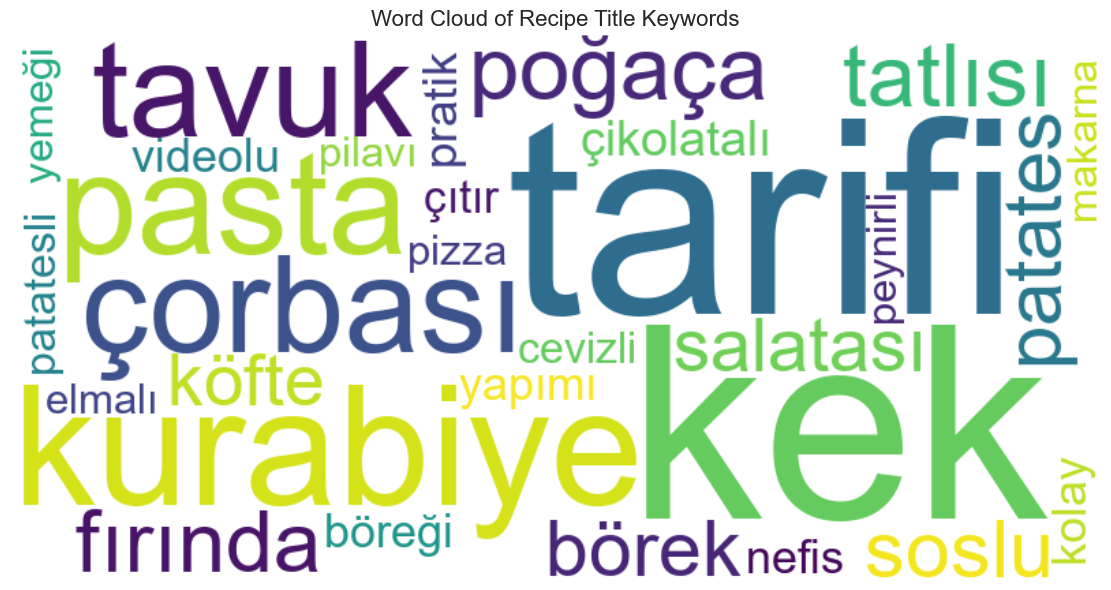

In [22]:
stop_words = set(stopwords.words('turkish'))

all_titles = df_recipes['tarif_adi'].dropna().astype(str).str.lower()
all_words = []
stop_words = set(stopwords.words('turkish'))

all_words = []
titles = df_recipes['tarif_adi'].dropna().astype(str).str.lower()
for title in titles:
    words = title.split()
    clean_words = [w.strip(".,;:!?()[]{}\"'-") for w in words]  # noktalama işaretlerini temizle
    filtered = [w for w in clean_words if w.isalpha() and w not in stop_words and len(w) > 1]
    all_words.extend(filtered)

word_freq = Counter(all_words).most_common(30)
print(word_freq)
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      font_path='C:\\Windows\\Fonts\\arial.ttf',
                      max_words=100).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Recipe Title Keywords', fontsize=16)
plt.tight_layout()
plt.savefig('..//graphs//recipe_title_wordcloud.png', dpi=300)
plt.close()


In [1]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch
df_clean = pd.read_csv("../datas/CullinaryMapDataset.csv")# Kullanıcı sayısı ve tarif sayısını şehir bazında gruplayalım
city_stats = df_clean.groupby('eslesen_sehir').agg({
    'profil_adi': pd.Series.nunique,  # unique kullanıcı sayısı
    'tarif_url': 'count'           # toplam tarif sayısı
}).rename(columns={
    'profil_adi': 'unique_user_count',
    'tarif_url': 'recipe_count'
})

top_cities = city_stats.sort_values(by='unique_user_count', ascending=False).head(20)
top_cities = top_cities.reset_index()
melted = top_cities.melt(id_vars='eslesen_sehir',
                         value_vars=['unique_user_count', 'recipe_count'],
                         var_name='Metric', value_name='Count')

# Renkleri açıkça belirt
colors = {
    'unique_user_count': '#e74c3c',  # kırmızı
    'recipe_count': '#3498db'       # mavi
}

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted,
                 y='eslesen_sehir',
                 x='Count',
                 hue='Metric',
                 palette=colors)

# Manual legend
legend_elements = [
    Patch(facecolor=colors['unique_user_count'], label='User Count'),
    Patch(facecolor=colors['recipe_count'], label='Recipe Count')
]
plt.legend(handles=legend_elements, title='Metric')

plt.title('Top 20 Cities by User and Recipe Counts')
plt.xlabel('Count')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('../graphs/Top 20 Cities User_Recipe.png', dpi=300)
plt.close()


In [12]:
from scipy.stats import pearsonr
city_stats = df_clean.groupby('eslesen_sehir').agg({
    'profil_adi': pd.Series.nunique,  # unique kullanıcı sayısı
    'tarif_url': 'count'           # toplam tarif sayısı
}).rename(columns={
    'profil_adi': 'unique_user_count',
    'tarif_url': 'recipe_count'
})

top_cities = city_stats.sort_values(by='unique_user_count', ascending=False)
top_cities = top_cities.reset_index()
melted = top_cities.melt(id_vars='eslesen_sehir',
                         value_vars=['unique_user_count', 'recipe_count'],
                         var_name='Metric', value_name='Count')
# Korelasyon katsayısı ve p-değeri
corr_value, p_value = pearsonr(top_cities['unique_user_count'], top_cities['recipe_count'])

print(f"Pearson correlation: {corr_value:.2f}")
print(f"P-value: {p_value:.4f}")


Pearson correlation: 1.00
P-value: 0.0000
